In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress
import math 

In [2]:
# Store filepath in a variable
file_family_2015 = "Resources/2015.csv"
file_family_2016 = "Resources/2016.csv"
file_family_2017 = "Resources/2017.csv"
file_family_2018 = "Resources/2018.csv"
file_family_2019 = "Resources/2019.csv"

In [3]:
# Read Data files with the pandas library
happiness_family_2015_df = pd.read_csv(file_family_2015, encoding="UTF-8")
happiness_family_2016_df = pd.read_csv(file_family_2016, encoding="UTF-8")
happiness_family_2017_df = pd.read_csv(file_family_2017, encoding="UTF-8")
happiness_family_2018_df = pd.read_csv(file_family_2018, encoding="UTF-8")
happiness_family_2019_df = pd.read_csv(file_family_2019, encoding="UTF-8")

In [4]:
clean_happiness_family_2016_df= happiness_family_2016_df.dropna(axis = 0, how = 'any')

In [5]:
happiness_family_2015_data =happiness_family_2015_df[["Country","Happiness Score","Family"]]
happiness_family_2016_data =happiness_family_2016_df[["Country","Happiness Score","Family"]]
happiness_family_2017_data =happiness_family_2017_df[["Country","Happiness.Score","Family"]]
happiness_family_2018_data =happiness_family_2018_df[["Country or region","Score","Social support"]]
happiness_family_2019_data =happiness_family_2019_df[["Country or region","Score","Social support"]]


In [6]:
# Rename Columns to match the datasets for previous years and add suffix for year
happiness_family_2015_data.rename(columns = {"Family" : "Family_2015","Happiness Score":"Happiness Score_2015"}, inplace = True)
happiness_family_2016_data.rename(columns = {"Family" : "Family_2016","Happiness Score":"Happiness Score_2016"}, inplace = True)
happiness_family_2017_data.rename(columns = {"Family" : "Family_2017","Happiness.Score":"Happiness Score_2017"}, inplace = True)
happiness_family_2018_data.rename(columns = {"Social support" : "Family_2018","Country or region": "Country","Score":"Happiness Score_2018"}, inplace = True)
happiness_family_2019_data.rename(columns = {"Social support" : "Family_2019", "Country or region": "Country","Score":"Happiness Score_2019"},inplace = True)


C:\Users\pino\.conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
# Combine the first two data sets in "happiness_family"
combined_family_15_16_df = pd.merge(happiness_family_2015_data,happiness_family_2016_data, how ="left",on= "Country")
combined_family_15_16_df

,Country,Happiness Score_2015,Family_2015,Happiness Score_2016,Family_2016
0,Switzerland,7.587,1.34951,7.509,1.14524
1,Iceland,7.561,1.40223,7.501,1.18326
2,Denmark,7.527,1.36058,7.526,1.16374
3,Norway,7.522,1.33095,7.498,1.12690
4,Canada,7.427,1.32261,7.404,1.09610
...,...,...,...,...,...
153,Rwanda,3.465,0.77370,3.515,0.61586
154,Benin,3.340,0.35386,3.484,0.10419
155,Syria,3.006,0.47489,3.069,0.14866
156,Burundi,2.905,0.41587,2.905,0.23442


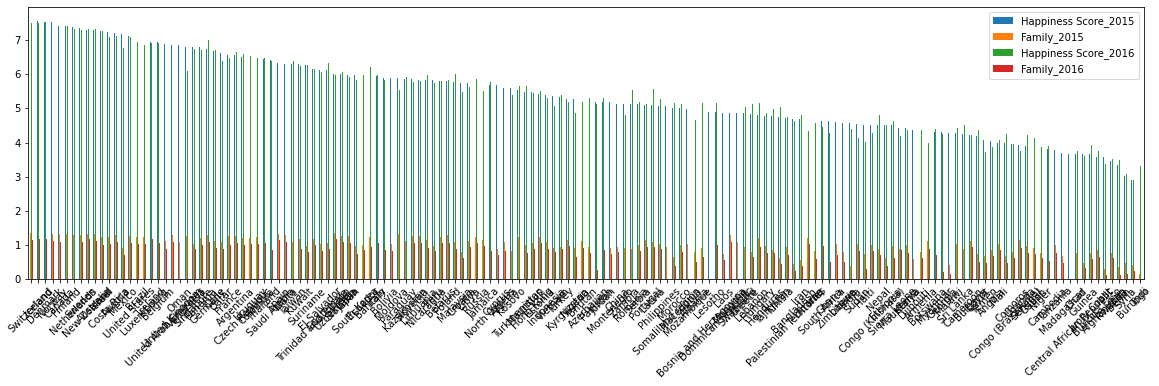

<Figure size 432x288 with 0 Axes>

In [55]:
# multiple plot

multi_plot =  combined_family_15_16_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(combined_family_15_16_df["Country"], rotation=45)

plt.show()
plt.tight_layout()

In [8]:
# merge 2017 to combined_family
combined_family_15_17_df = pd.merge(combined_family_15_16_df, happiness_family_2017_data, how ="left",on= "Country")
combined_family_15_17_df

,Country,Happiness Score_2015,Family_2015,Happiness Score_2016,Family_2016,Happiness Score_2017,Family_2017
0,Switzerland,7.587,1.34951,7.509,1.14524,7.494,1.516912
1,Iceland,7.561,1.40223,7.501,1.18326,7.504,1.610574
2,Denmark,7.527,1.36058,7.526,1.16374,7.522,1.551122
3,Norway,7.522,1.33095,7.498,1.12690,7.537,1.533524
4,Canada,7.427,1.32261,7.404,1.09610,7.316,1.481349
...,...,...,...,...,...,...,...
153,Rwanda,3.465,0.77370,3.515,0.61586,3.471,0.945707
154,Benin,3.340,0.35386,3.484,0.10419,3.657,0.435300
155,Syria,3.006,0.47489,3.069,0.14866,3.462,0.396103
156,Burundi,2.905,0.41587,2.905,0.23442,2.905,0.629794


In [ ]:
# multiple plot

multi_plot =  combined_family_15_16_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(combined_family_15_16_df["Country"], rotation=45)

plt.show()
plt.tight_layout()

In [9]:
# merge 2018 to combined_family
combined_family_15_18_df = pd.merge(combined_family_15_17_df, happiness_family_2018_data, how ="left",on= "Country")

combined_family_15_18_df

,Country,Happiness Score_2015,Family_2015,Happiness Score_2016,Family_2016,Happiness Score_2017,Family_2017,Happiness Score_2018,Family_2018
0,Switzerland,7.587,1.34951,7.509,1.14524,7.494,1.516912,7.487,1.549
1,Iceland,7.561,1.40223,7.501,1.18326,7.504,1.610574,7.495,1.644
2,Denmark,7.527,1.36058,7.526,1.16374,7.522,1.551122,7.555,1.590
3,Norway,7.522,1.33095,7.498,1.12690,7.537,1.533524,7.594,1.582
4,Canada,7.427,1.32261,7.404,1.09610,7.316,1.481349,7.328,1.532
...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,0.77370,3.515,0.61586,3.471,0.945707,3.408,0.896
154,Benin,3.340,0.35386,3.484,0.10419,3.657,0.435300,4.141,0.372
155,Syria,3.006,0.47489,3.069,0.14866,3.462,0.396103,3.462,0.382
156,Burundi,2.905,0.41587,2.905,0.23442,2.905,0.629794,2.905,0.627


In [11]:
# merge 2019 to combined_family
combined_family_15_19_df = pd.merge(combined_family_15_18_df, happiness_family_2019_data, how ="left",on= "Country")
combined_family_15_19_df

,Country,Happiness Score_2015,Family_2015,Happiness Score_2016,Family_2016,Happiness Score_2017,Family_2017,Happiness Score_2018,Family_2018,Happiness Score_2019,Family_2019
0,Switzerland,7.587,1.34951,7.509,1.14524,7.494,1.516912,7.487,1.549,7.480,1.526
1,Iceland,7.561,1.40223,7.501,1.18326,7.504,1.610574,7.495,1.644,7.494,1.624
2,Denmark,7.527,1.36058,7.526,1.16374,7.522,1.551122,7.555,1.590,7.600,1.573
3,Norway,7.522,1.33095,7.498,1.12690,7.537,1.533524,7.594,1.582,7.554,1.582
4,Canada,7.427,1.32261,7.404,1.09610,7.316,1.481349,7.328,1.532,7.278,1.505
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,0.77370,3.515,0.61586,3.471,0.945707,3.408,0.896,3.334,0.711
154,Benin,3.340,0.35386,3.484,0.10419,3.657,0.435300,4.141,0.372,4.883,0.437
155,Syria,3.006,0.47489,3.069,0.14866,3.462,0.396103,3.462,0.382,3.462,0.378
156,Burundi,2.905,0.41587,2.905,0.23442,2.905,0.629794,2.905,0.627,3.775,0.447


In [12]:
# set country as index
original_family_df = combined_family_15_19_df.set_index("Country")
original_family_df


,Happiness Score_2015,Family_2015,Happiness Score_2016,Family_2016,Happiness Score_2017,Family_2017,Happiness Score_2018,Family_2018,Happiness Score_2019,Family_2019
Country,,,,,,,,,,
Switzerland,7.587,1.34951,7.509,1.14524,7.494,1.516912,7.487,1.549,7.480,1.526
Iceland,7.561,1.40223,7.501,1.18326,7.504,1.610574,7.495,1.644,7.494,1.624
Denmark,7.527,1.36058,7.526,1.16374,7.522,1.551122,7.555,1.590,7.600,1.573
Norway,7.522,1.33095,7.498,1.12690,7.537,1.533524,7.594,1.582,7.554,1.582
Canada,7.427,1.32261,7.404,1.09610,7.316,1.481349,7.328,1.532,7.278,1.505
...,...,...,...,...,...,...,...,...,...,...
Rwanda,3.465,0.77370,3.515,0.61586,3.471,0.945707,3.408,0.896,3.334,0.711
Benin,3.340,0.35386,3.484,0.10419,3.657,0.435300,4.141,0.372,4.883,0.437
Syria,3.006,0.47489,3.069,0.14866,3.462,0.396103,3.462,0.382,3.462,0.378


In [13]:
# drop any rows that has missing data

original_family_df.dropna(axis = 0,how = "any")
original_family_df

,Happiness Score_2015,Family_2015,Happiness Score_2016,Family_2016,Happiness Score_2017,Family_2017,Happiness Score_2018,Family_2018,Happiness Score_2019,Family_2019
Country,,,,,,,,,,
Switzerland,7.587,1.34951,7.509,1.14524,7.494,1.516912,7.487,1.549,7.480,1.526
Iceland,7.561,1.40223,7.501,1.18326,7.504,1.610574,7.495,1.644,7.494,1.624
Denmark,7.527,1.36058,7.526,1.16374,7.522,1.551122,7.555,1.590,7.600,1.573
Norway,7.522,1.33095,7.498,1.12690,7.537,1.533524,7.594,1.582,7.554,1.582
Canada,7.427,1.32261,7.404,1.09610,7.316,1.481349,7.328,1.532,7.278,1.505
...,...,...,...,...,...,...,...,...,...,...
Rwanda,3.465,0.77370,3.515,0.61586,3.471,0.945707,3.408,0.896,3.334,0.711
Benin,3.340,0.35386,3.484,0.10419,3.657,0.435300,4.141,0.372,4.883,0.437
Syria,3.006,0.47489,3.069,0.14866,3.462,0.396103,3.462,0.382,3.462,0.378


In [14]:
combined_family_15_19_df.to_csv("Resources/combined_family_15_19_df.csv")

In [15]:
# Create DataFrame with Happiness score per date
avg_familyHappiness_df = combined_family_15_19_df[["Country", "Happiness Score_2015","Family_2015", "Happiness Score_2016","Family_2016", "Happiness Score_2017",\
                                      "Family_2017", "Happiness Score_2018","Family_2018", "Happiness Score_2019", "Family_2019"]]
avg_familyHappiness_df.head()

,Country,Happiness Score_2015,Family_2015,Happiness Score_2016,Family_2016,Happiness Score_2017,Family_2017,Happiness Score_2018,Family_2018,Happiness Score_2019,Family_2019
0,Switzerland,7.587,1.34951,7.509,1.14524,7.494,1.516912,7.487,1.549,7.480,1.526
1,Iceland,7.561,1.40223,7.501,1.18326,7.504,1.610574,7.495,1.644,7.494,1.624
2,Denmark,7.527,1.36058,7.526,1.16374,7.522,1.551122,7.555,1.590,7.600,1.573
3,Norway,7.522,1.33095,7.498,1.12690,7.537,1.533524,7.594,1.582,7.554,1.582
4,Canada,7.427,1.32261,7.404,1.09610,7.316,1.481349,7.328,1.532,7.278,1.505


In [16]:
# Calculate Avg. Happiness  
avg_familyHappiness_df['Avg Happiness'] = (avg_familyHappiness_df["Happiness Score_2015"] + 
                         avg_familyHappiness_df["Happiness Score_2016"]+ 
                           avg_familyHappiness_df["Happiness Score_2017"]+ 
                           avg_familyHappiness_df["Happiness Score_2018"]+ 
                           avg_familyHappiness_df["Happiness Score_2019"])/5

#avg_Happiness_df.to_csv("Resources/avg_Happiness.csv")
avg_familyHappiness_df

,Country,Happiness Score_2015,Family_2015,Happiness Score_2016,Family_2016,Happiness Score_2017,Family_2017,Happiness Score_2018,Family_2018,Happiness Score_2019,Family_2019,Avg Happiness
0,Switzerland,7.587,1.34951,7.509,1.14524,7.494,1.516912,7.487,1.549,7.480,1.526,7.5114
1,Iceland,7.561,1.40223,7.501,1.18326,7.504,1.610574,7.495,1.644,7.494,1.624,7.5110
2,Denmark,7.527,1.36058,7.526,1.16374,7.522,1.551122,7.555,1.590,7.600,1.573,7.5460
3,Norway,7.522,1.33095,7.498,1.12690,7.537,1.533524,7.594,1.582,7.554,1.582,7.5410
4,Canada,7.427,1.32261,7.404,1.09610,7.316,1.481349,7.328,1.532,7.278,1.505,7.3506
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,0.77370,3.515,0.61586,3.471,0.945707,3.408,0.896,3.334,0.711,3.4386
154,Benin,3.340,0.35386,3.484,0.10419,3.657,0.435300,4.141,0.372,4.883,0.437,3.9010
155,Syria,3.006,0.47489,3.069,0.14866,3.462,0.396103,3.462,0.382,3.462,0.378,3.2922
156,Burundi,2.905,0.41587,2.905,0.23442,2.905,0.629794,2.905,0.627,3.775,0.447,3.0790


In [17]:
new_avg_familyHappiness_df=avg_familyHappiness_df.dropna(axis = 0, how ='any')
new_avg_familyHappiness_df

,Country,Happiness Score_2015,Family_2015,Happiness Score_2016,Family_2016,Happiness Score_2017,Family_2017,Happiness Score_2018,Family_2018,Happiness Score_2019,Family_2019,Avg Happiness
0,Switzerland,7.587,1.34951,7.509,1.14524,7.494,1.516912,7.487,1.549,7.480,1.526,7.5114
1,Iceland,7.561,1.40223,7.501,1.18326,7.504,1.610574,7.495,1.644,7.494,1.624,7.5110
2,Denmark,7.527,1.36058,7.526,1.16374,7.522,1.551122,7.555,1.590,7.600,1.573,7.5460
3,Norway,7.522,1.33095,7.498,1.12690,7.537,1.533524,7.594,1.582,7.554,1.582,7.5410
4,Canada,7.427,1.32261,7.404,1.09610,7.316,1.481349,7.328,1.532,7.278,1.505,7.3506
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,0.77370,3.515,0.61586,3.471,0.945707,3.408,0.896,3.334,0.711,3.4386
154,Benin,3.340,0.35386,3.484,0.10419,3.657,0.435300,4.141,0.372,4.883,0.437,3.9010
155,Syria,3.006,0.47489,3.069,0.14866,3.462,0.396103,3.462,0.382,3.462,0.378,3.2922
156,Burundi,2.905,0.41587,2.905,0.23442,2.905,0.629794,2.905,0.627,3.775,0.447,3.0790


In [19]:
# Calculate Avg. Happiness  
new_avg_familyHappiness_df['Avg Family'] = (new_avg_familyHappiness_df["Family_2015"] + 
                         new_avg_familyHappiness_df["Family_2016"]+ 
                           new_avg_familyHappiness_df["Family_2017"]+ 
                           new_avg_familyHappiness_df["Family_2018"]+ 
                           new_avg_familyHappiness_df["Family_2019"])/5


new_avg_familyHappiness_df

C:\Users\pino\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Happiness Score_2015,Family_2015,Happiness Score_2016,Family_2016,Happiness Score_2017,Family_2017,Happiness Score_2018,Family_2018,Happiness Score_2019,Family_2019,Avg Happiness,Avg Family
0,Switzerland,7.587,1.34951,7.509,1.14524,7.494,1.516912,7.487,1.549,7.480,1.526,7.5114,1.417332
1,Iceland,7.561,1.40223,7.501,1.18326,7.504,1.610574,7.495,1.644,7.494,1.624,7.5110,1.492813
2,Denmark,7.527,1.36058,7.526,1.16374,7.522,1.551122,7.555,1.590,7.600,1.573,7.5460,1.447688
3,Norway,7.522,1.33095,7.498,1.12690,7.537,1.533524,7.594,1.582,7.554,1.582,7.5410,1.431075
4,Canada,7.427,1.32261,7.404,1.09610,7.316,1.481349,7.328,1.532,7.278,1.505,7.3506,1.387412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,0.77370,3.515,0.61586,3.471,0.945707,3.408,0.896,3.334,0.711,3.4386,0.788453
154,Benin,3.340,0.35386,3.484,0.10419,3.657,0.435300,4.141,0.372,4.883,0.437,3.9010,0.340470
155,Syria,3.006,0.47489,3.069,0.14866,3.462,0.396103,3.462,0.382,3.462,0.378,3.2922,0.355931
156,Burundi,2.905,0.41587,2.905,0.23442,2.905,0.629794,2.905,0.627,3.775,0.447,3.0790,0.470817


In [52]:
df = pd.DataFrame(new_avg_familyHappiness_df, index=ts.index, columns=list("ABCD"))

df = df.cumsum()

plt.figure();

df.plot();

NameError: name 'ts' is not defined

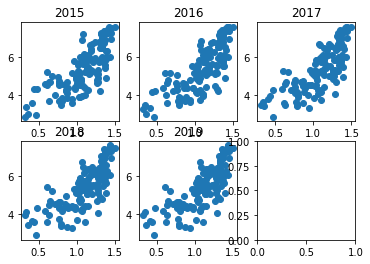

In [51]:
# Multiple Plots using subplot () Function
X =pd.DataFrame(new_avg_familyHappiness_df["Avg Family"])
  
# Using built-in trigonometric function we can directly plot 
# the given cosine wave for the given angles 
Y1 = pd.DataFrame(new_avg_familyHappiness_df["Happiness Score_2015"])
Y2 = pd.DataFrame(new_avg_familyHappiness_df["Happiness Score_2016"]) 
Y3 = pd.DataFrame(new_avg_familyHappiness_df["Happiness Score_2017"]) 
Y4 = pd.DataFrame(new_avg_familyHappiness_df["Happiness Score_2018"]) 
Y5 = pd.DataFrame(new_avg_familyHappiness_df["Happiness Score_2019"])

# Initialise the subplot function using number of rows and columns 
figure, axis = plt.subplots(2, 3) 
  
# For 2015 
axis[0, 0].scatter(X, Y1) 
axis[0, 0].set_title("2015") 
  
# For 2016 
axis[0, 1].scatter(X, Y2) 
axis[0, 1].set_title("2016") 
  
# For 2017 
axis[0, 2].scatter(X, Y3) 
axis[0, 2].set_title("2017") 
  
# For 2018 
axis[1, 0].scatter(X, Y4) 
axis[1, 0].set_title("2018") 

# For 2019 
axis[1, 1].scatter(X, Y4) 
axis[1, 1].set_title("2019")   
# Combine all the operations and display 
plt.savefig("images/Year_Happiness_ScatterPlot.png")
plt.show() 



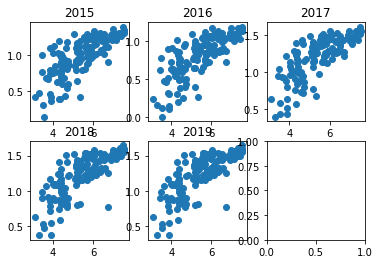

In [50]:
# Multiple Plots using subplot () Function
X =pd.DataFrame(new_avg_familyHappiness_df["Avg Happiness"])
  
# Using built-in trigonometric function we can directly plot 
# the given cosine wave for the given angles 
Y1 = pd.DataFrame(new_avg_familyHappiness_df["Family_2015"])
Y2 = pd.DataFrame(new_avg_familyHappiness_df["Family_2016"]) 
Y3 = pd.DataFrame(new_avg_familyHappiness_df["Family_2017"]) 
Y4 = pd.DataFrame(new_avg_familyHappiness_df["Family_2018"]) 
Y5 = pd.DataFrame(new_avg_familyHappiness_df["Family_2019"])
  
# Initialise the subplot function using number of rows and columns 
figure, axis = plt.subplots(2, 3) 
  
# For 2015 
axis[0, 0].scatter(X, Y1) 
axis[0, 0].set_title("2015") 
  
# For 2016 
axis[0, 1].scatter(X, Y2) 
axis[0, 1].set_title("2016") 
  
# For 2017 
axis[0, 2].scatter(X, Y3) 
axis[0, 2].set_title("2017") 
  
# For 2018 
axis[1, 0].scatter(X, Y4) 
axis[1, 0].set_title("2018") 

# For 2019 
axis[1, 1].scatter(X, Y4) 
axis[1, 1].set_title("2019") 
plt.savefig("images/Year_Family_scatterPlot.png")  
# Combine all the operations and display 
plt.show() 


In [22]:
avg_familyHappiness_df.set_index("Country")

,Happiness Score_2015,Family_2015,Happiness Score_2016,Family_2016,Happiness Score_2017,Family_2017,Happiness Score_2018,Family_2018,Happiness Score_2019,Family_2019,Avg Happiness
Country,,,,,,,,,,,
Switzerland,7.587,1.34951,7.509,1.14524,7.494,1.516912,7.487,1.549,7.480,1.526,7.5114
Iceland,7.561,1.40223,7.501,1.18326,7.504,1.610574,7.495,1.644,7.494,1.624,7.5110
Denmark,7.527,1.36058,7.526,1.16374,7.522,1.551122,7.555,1.590,7.600,1.573,7.5460
Norway,7.522,1.33095,7.498,1.12690,7.537,1.533524,7.594,1.582,7.554,1.582,7.5410
Canada,7.427,1.32261,7.404,1.09610,7.316,1.481349,7.328,1.532,7.278,1.505,7.3506
...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,3.465,0.77370,3.515,0.61586,3.471,0.945707,3.408,0.896,3.334,0.711,3.4386
Benin,3.340,0.35386,3.484,0.10419,3.657,0.435300,4.141,0.372,4.883,0.437,3.9010
Syria,3.006,0.47489,3.069,0.14866,3.462,0.396103,3.462,0.382,3.462,0.378,3.2922


In [23]:
new_avg_familyHappiness_df.set_index("Country")

,Happiness Score_2015,Family_2015,Happiness Score_2016,Family_2016,Happiness Score_2017,Family_2017,Happiness Score_2018,Family_2018,Happiness Score_2019,Family_2019,Avg Happiness,Avg Family
Country,,,,,,,,,,,,
Switzerland,7.587,1.34951,7.509,1.14524,7.494,1.516912,7.487,1.549,7.480,1.526,7.5114,1.417332
Iceland,7.561,1.40223,7.501,1.18326,7.504,1.610574,7.495,1.644,7.494,1.624,7.5110,1.492813
Denmark,7.527,1.36058,7.526,1.16374,7.522,1.551122,7.555,1.590,7.600,1.573,7.5460,1.447688
Norway,7.522,1.33095,7.498,1.12690,7.537,1.533524,7.594,1.582,7.554,1.582,7.5410,1.431075
Canada,7.427,1.32261,7.404,1.09610,7.316,1.481349,7.328,1.532,7.278,1.505,7.3506,1.387412
...,...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,3.465,0.77370,3.515,0.61586,3.471,0.945707,3.408,0.896,3.334,0.711,3.4386,0.788453
Benin,3.340,0.35386,3.484,0.10419,3.657,0.435300,4.141,0.372,4.883,0.437,3.9010,0.340470
Syria,3.006,0.47489,3.069,0.14866,3.462,0.396103,3.462,0.382,3.462,0.378,3.2922,0.355931


In [24]:
new_working_avg_familyHappiness_df =new_avg_familyHappiness_df[["Country", "Avg Family", "Avg Happiness"]] 
new_working_avg_familyHappiness_df

,Country,Avg Family,Avg Happiness
0,Switzerland,1.417332,7.5114
1,Iceland,1.492813,7.5110
2,Denmark,1.447688,7.5460
3,Norway,1.431075,7.5410
4,Canada,1.387412,7.3506
...,...,...,...
153,Rwanda,0.788453,3.4386
154,Benin,0.340470,3.9010
155,Syria,0.355931,3.2922
156,Burundi,0.470817,3.0790


In [25]:
new_working_avg_familyHappiness_df.set_index("Country")

,Avg Family,Avg Happiness
Country,,
Switzerland,1.417332,7.5114
Iceland,1.492813,7.5110
Denmark,1.447688,7.5460
Norway,1.431075,7.5410
Canada,1.387412,7.3506
...,...,...
Rwanda,0.788453,3.4386
Benin,0.340470,3.9010
Syria,0.355931,3.2922


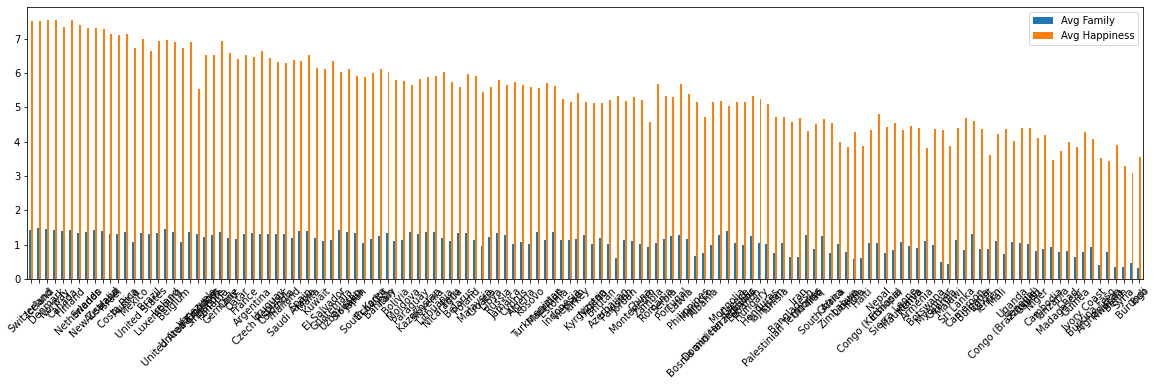

<Figure size 432x288 with 0 Axes>

In [56]:
# multiple plot

multi_plot =  new_working_avg_familyHappiness_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(new_working_avg_familyHappiness_df["Country"], rotation=45)

plt.show()
plt.tight_layout()

In [26]:
# create the bins
bins = [0, 3.9, 4.9, 5.9, 6.9, 7.9]
group_labels = ["< 3.9","4.0 to 4.9", "5.0 to 5.9", "6.0 to 6.9", "> 7.0"]

In [27]:
new_working_avg_familyHappiness_df["Avg Happiness Group"] = pd.cut(new_working_avg_familyHappiness_df["Avg Happiness"], bins, labels=group_labels, include_lowest=True)
new_working_avg_familyHappiness_df

C:\Users\pino\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,Avg Family,Avg Happiness,Avg Happiness Group
0,Switzerland,1.417332,7.5114,> 7.0
1,Iceland,1.492813,7.5110,> 7.0
2,Denmark,1.447688,7.5460,> 7.0
3,Norway,1.431075,7.5410,> 7.0
4,Canada,1.387412,7.3506,> 7.0
...,...,...,...,...
153,Rwanda,0.788453,3.4386,< 3.9
154,Benin,0.340470,3.9010,4.0 to 4.9
155,Syria,0.355931,3.2922,< 3.9
156,Burundi,0.470817,3.0790,< 3.9


In [28]:
# Creating a group based off of the bins

new_working_avg_familyHappiness_group = new_working_avg_familyHappiness_df.groupby("Avg Happiness Group")
new_working_avg_familyHappiness_group.min()

,Country,Avg Family,Avg Happiness
Avg Happiness Group,,,
< 3.9,Afghanistan,0.323567,3.0790
4.0 to 4.9,Albania,0.340470,3.9010
5.0 to 5.9,Algeria,0.608830,5.0292
6.0 to 6.9,Argentina,1.069860,5.9040
> 7.0,Australia,1.315161,6.9100


In [29]:
new_working_avg_familyHappiness_group.max()

,Country,Avg Family,Avg Happiness
Avg Happiness Group,,,
< 3.9,Yemen,1.107411,3.8830
4.0 to 4.9,Zimbabwe,1.298788,4.8124
5.0 to 5.9,Vietnam,1.386288,5.8880
6.0 to 6.9,Uzbekistan,1.434100,6.7442
> 7.0,United States,1.492813,7.5460


In [30]:
new_working_avg_familyHappiness_df["Avg Happiness Group"].value_counts()

5.0 to 5.9    44
4.0 to 4.9    36
6.0 to 6.9    29
> 7.0         19
< 3.9         13
Name: Avg Happiness Group, dtype: int64

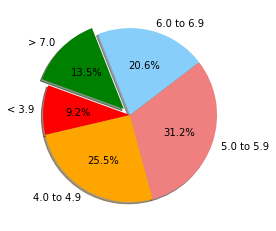

In [47]:
# Labels for the sections of our pie chart
labels = ["< 3.9", "4.0 to 4.9", "5.0 to 5.9","6.0 to 6.9 ", "> 7.0"]

# The values of each section of the pie chart
sizes = [13, 36, 44, 29, 19]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "Green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.savefig("images/Pie_Proportion_HappyScore.png")

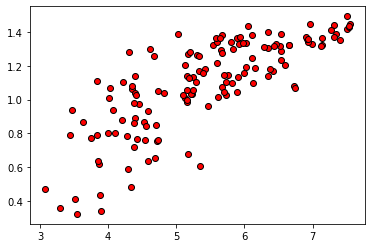

In [48]:
# Plot out "Avg Happiness Score vs Avg Family Score"
x_axis = new_working_avg_familyHappiness_df["Avg Happiness"]
y_axis = new_working_avg_familyHappiness_df["Avg Family"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")

plt.savefig("images/AvgHappy_AvgFamily.png")

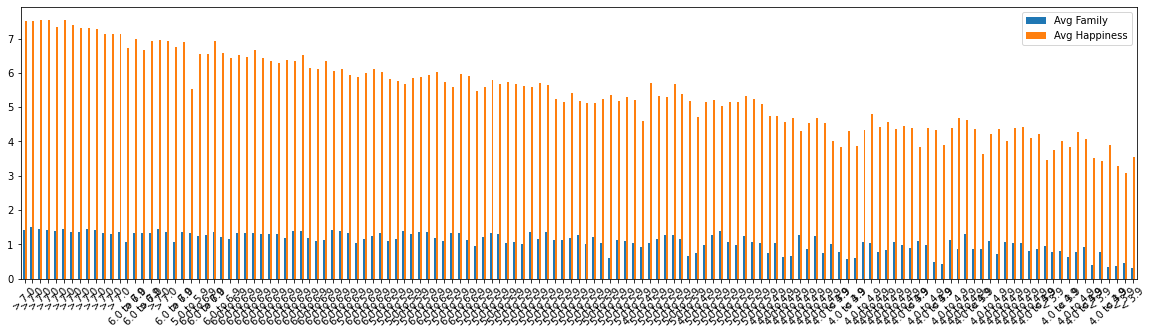

<Figure size 432x288 with 0 Axes>

In [59]:
# multiple plot

multi_plot =  new_working_avg_familyHappiness_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(new_working_avg_familyHappiness_df["Avg Happiness Group"], rotation=45)
plt.savefig("images/Multiplot_Family_bar.png")
plt.show()
plt.tight_layout()

The r-squared is: 0.7807783765502894


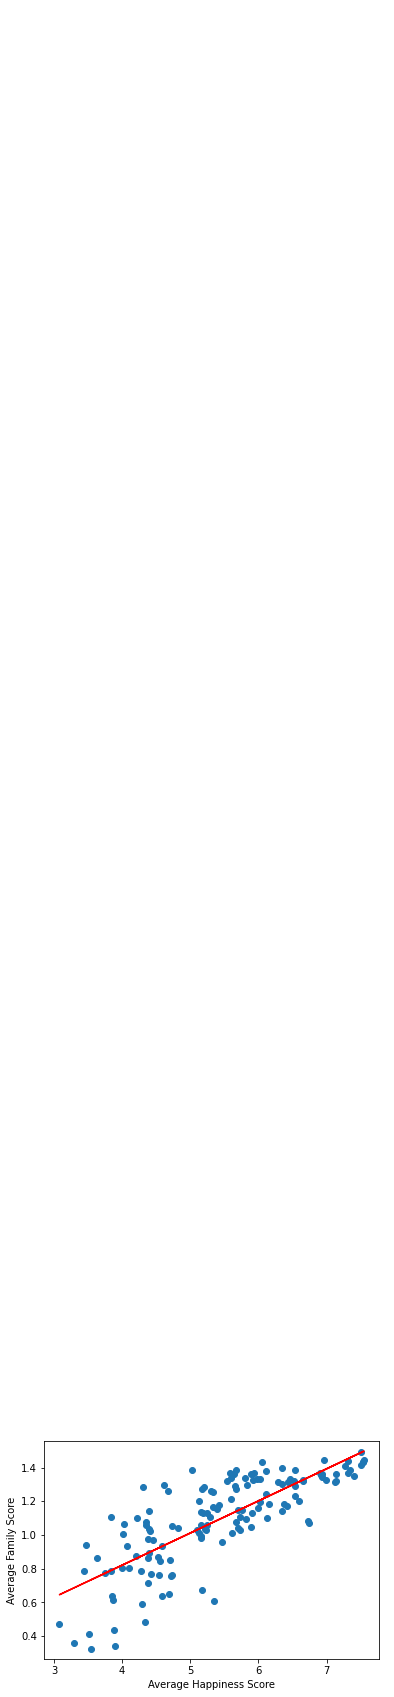

In [49]:
# Add the linear regression equation and line to plot
x_values = new_working_avg_familyHappiness_df["Avg Happiness"]
y_values = new_working_avg_familyHappiness_df["Avg Family"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average Happiness Score')
plt.ylabel('Average Family Score')
print(f"The r-squared is: {rvalue}")
plt.savefig("images/Family_Reg.png")
plt.show()